# Preprocessing time-series data using Pandas

This notebook is intended to introduce you to the basic Pandas DateTime    
The following five points will be covered:

## A. Content:

1. [Parsing DateTime](#task1)
2. [Aggregating columns](#task2)
3. [Extracting DateTime properties](#task3)
4. [Fitering and Selecting specific durations](#task4)
5. [Changing the granularity of the Timeseries](#task5)

## B. Prerequisites: 
1. Basic knowledge of Python and Pandas
2. Kaggle account

## C. Code along:
**Option 1. On Kaggle (recommended):**   
1. Sign in to www.kaggle.com 
2. Copy this notebook: https://www.kaggle.com/deenagergis/20201019-pandas-timeseries-tutorial-blank
3. Have fun coding! 

**Option 2. On your local machine:**
1. Clone the following Repository: https://github.com/Deena-Gergis/pandas_timeseries_tutorial
2. *(Optional) Create a new virtual environment*  
3. Install the requirements.txt using `pip install -r <your_local_path>/requirements.txt ` or `conda install --yes --file <your_local_path>/requirements.txt`
4. Connect to Kaggle from your local machine: https://github.com/Kaggle/kaggle-api#api-credentials
5. Open the `blank_pandas_timeseries.ipynb` notebook and code along
6. Have fun coding! 


## D. References: 

* *A 3 minute guide:* https://www.linkedin.com/pulse/your-3-minute-guide-pandas-timeseries-deena-gergis-msc-/
* *Official documentation:* https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

__________

# I. Prepare

In [1]:
## Configs and Constants
DATASET_NAME = 'shivamb/netflix-shows'
FILE_NAME = 'netflix_titles.csv'
DATA_DIR  = './data'

In [2]:
import os

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from kaggle import KaggleApi

In [3]:
# Set default properties for plotting 
plt.rcParams['figure.figsize'] = [11, 4]
plt.rcParams['figure.dpi'] = 100 

### Download and read data from Kaggle 

In [4]:
# Download data
kaggle = KaggleApi()
kaggle.authenticate()
kaggle.dataset_download_files(DATASET_NAME, path=DATA_DIR, unzip=True)

In [5]:
# Read and show data
raw_path = os.path.join(DATA_DIR, FILE_NAME)
raw_df = pd.read_csv(raw_path)

In [6]:
raw_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2976,s2977,TV Show,Unauthorized Living,NaN,"José Coronado, Álex González, Claudia Traisac,...",Spain,"January 31, 2020",2020,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, Spanis...",When a Galician shipper and drug lord hiding h...
8364,s8365,Movie,The Intent 2: The Come Up,"Femi Oyeniran, Nicky Slimting Walker","Justin Clarke Samuel, Ashley Chin, Nicky Slimt...",United Kingdom,"February 21, 2019",2018,TV-MA,103 min,"Dramas, International Movies","During a trip to Jamaica, a London gang target..."
4340,s4341,TV Show,Haunted House,NaN,"Jo Hyun-jung, Gim Young-eun, Gim Chae-ha, I So...",NaN,"December 1, 2018",2017,TV-G,1 Season,"Kids' TV, Korean TV Shows",With help from a 102-year-old goblin dwelling ...
340,s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","August 1, 2021",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...
3903,s3904,Movie,Someone Great,Jennifer Kaytin Robinson,"Gina Rodriguez, Brittany Snow, DeWanda Wise, L...",United States,"April 19, 2019",2019,R,92 min,"Comedies, Romantic Movies","On the heels of a blindsiding breakup, music j..."


In [7]:
raw_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

____________

# II. Preprocess


## Task 1: Count the number of shows added per day     

In the following section, we will parse the raw date format into pandas datetime and summarize the daily shows added to the total number 

### Parse timestamp into datetime column <a id='task1'></a>

Change the raw format to a pandas datetime format.    
Once we have changed the format as such, we will be able to apply more functionalities illustrated below 


In [8]:
# Copy original data
df = raw_df.copy()

# Parse the raw `date_added` column to pandas datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Check the type of the `date_added` column
df['date_added'].dtypes

dtype('<M8[ns]')

### Count shows added  per date <a id='task2'></a>
All the shows have been listed in the original dataframe.     
Now let's count the total number of shows added per day

,number_of_shows_added
date_added,
2008-01-01,1
2008-02-04,1
2009-05-05,1
2009-11-18,1
2010-11-01,1
...,...
2021-09-21,5
2021-09-22,9
2021-09-23,2


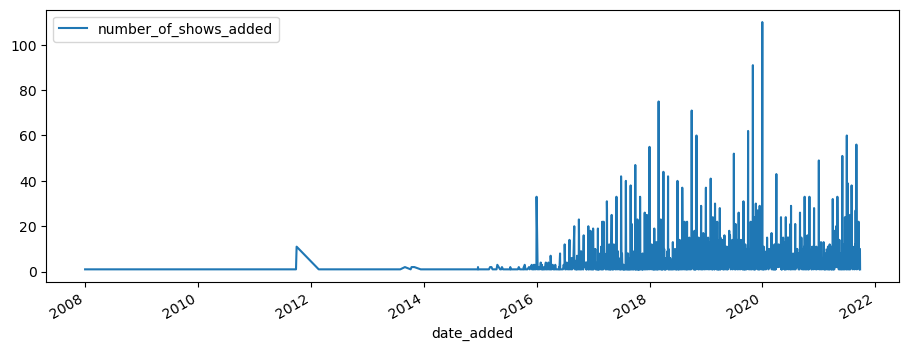

In [9]:
# For each date, count the number of show added
# Note the regular usegae of `groupby` method
shows_added = df.groupby('date_added')[['show_id']].count()

# Rename column to describe the new content 
shows_added = shows_added.rename({'show_id': 
                                  'number_of_shows_added'}, 
                                 axis=1)

# View and plot TimeSeries 
shows_added.plot()
shows_added

______

## Task 2: Extract the day name and sum-up the shows added 
<a id='task3'></a>

In the last step, we have used the `date_added` column to count the number of shows.    
Since we've used the `groupby` functionality to count the number of shows,     
the column is set as our index. 

We could now use our new index directly to extract the Attributes of the timestamp.    
One example of those Attributes is the `day_name`.    
Check out the [full list of the attributes here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html).

In [10]:
# Add day name as a seperate column
shows_added['day_name'] = shows_added.index.day_name()

# Group by the extracted day name and sum up the 
total_per_weekday = shows_added.groupby('day_name')['number_of_shows_added'].sum()

# View results
# ... Seems that Netflix prefers to release the new shows on Fridays 
total_per_weekday

day_name
Friday       2498
Monday        851
Saturday      816
Sunday        751
Thursday     1396
Tuesday      1197
Wednesday    1288
Name: number_of_shows_added, dtype: int64

______

## Task 3: Select data from 2016 onwards 
<a id='task4'></a>
You can also use the regular masking way to select and filter entries.      
The syntax is even simpler than one could expect. You don't even need to parse    
your filtering criteria to `datetime`. A simple string with `%YYYY-%MM-%DD` format     
will do the job  


<AxesSubplot:xlabel='date_added'>

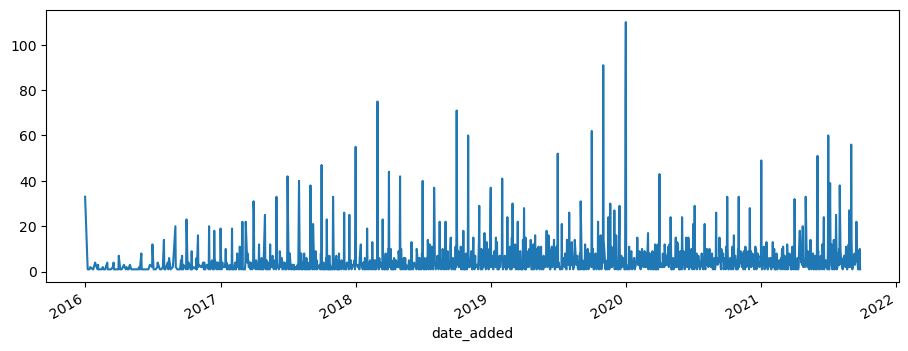

In [11]:
# Create mask of booleans from the required start date
# Note that the date is simple string and does not have to be a parsed datetime variable
mask = shows_added.index >= '2016-01-01'

# Apply the boolean mask to the dataframe 
shows_added = shows_added.loc[mask,:].copy()

# Plot the filtered data 
shows_added['number_of_shows_added'].plot()

______

## Task 4: Sum up weekly data 
<a id='task5'></a>

It is possible to change the granularity of your timeseries directly using Pandas datetie module.        
       
       
To do that, you need to specify two things: 
- Your new granularity passed as an argument to the `resample` function. [Read more details](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)
- The function that will be used to generate the new granularity

In [12]:
# Use the resampling function to group data per week
weekly_data = (shows_added.
               resample('1W')   # For each week 
               .sum())          # Calculate the sum

,number_of_shows_added
date_added,
2016-01-03,33
2016-01-10,1
2016-01-17,3
2016-01-24,2
2016-01-31,4
...,...
2021-08-29,55
2021-09-05,81
2021-09-12,28


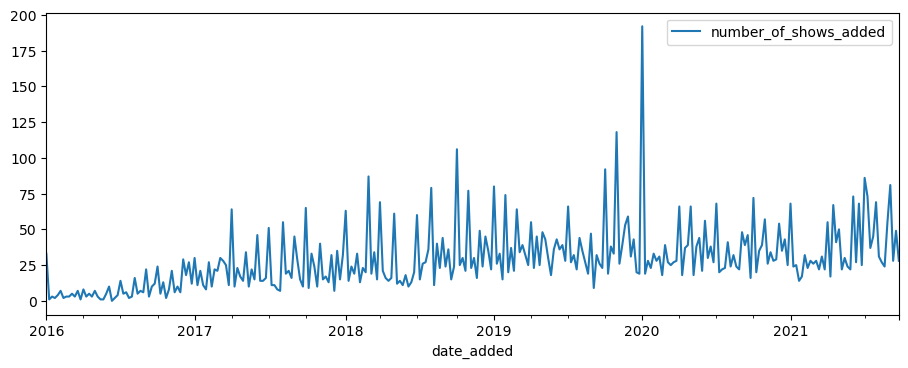

In [13]:
# View and plot weekly data  
weekly_data.plot()
weekly_data